# **Reynara Ezra Pratama**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 189 µs (started: 2021-07-17 10:24:16 +00:00)


In [3]:
import pandas as pd

time: 1.71 ms (started: 2021-07-17 10:24:34 +00:00)


In [5]:
df = pd.read_csv('/content/emotion.txt', names = ['sentence', 'emote'], sep=';')

time: 37.8 ms (started: 2021-07-17 10:25:23 +00:00)


In [6]:
df.head()

,sentence,emote
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


time: 17.3 ms (started: 2021-07-17 10:25:28 +00:00)


In [7]:
df.tail()

,sentence,emote
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


time: 13.3 ms (started: 2021-07-17 10:25:37 +00:00)


In [9]:
df.sample(5)

,sentence,emote
5297,i still feel really regretful for leaving,sadness
45,i was feeling listless from the need of new th...,sadness
2075,im feeling pressured at my desk due to the pil...,fear
12035,i am ruining her feeling and was disturbed a h...,sadness
9043,i feel privileged to be invited in and am trea...,joy


time: 17.2 ms (started: 2021-07-17 10:25:47 +00:00)


In [10]:
print('Number of Data:',len(df))

Number of Data: 16000
time: 1.34 ms (started: 2021-07-17 10:26:00 +00:00)


In [11]:
df['emote'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emote, dtype: int64

time: 13.7 ms (started: 2021-07-17 10:26:05 +00:00)


In [12]:
category = pd.get_dummies(df['emote'])
category.head()

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0


time: 26.1 ms (started: 2021-07-17 10:26:12 +00:00)


In [13]:
df = df.drop('emote', axis=1)

time: 4.54 ms (started: 2021-07-17 10:26:19 +00:00)


In [14]:
df_new = pd.concat([df, category], axis=1)
df_new.head()

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0


time: 26.1 ms (started: 2021-07-17 10:26:26 +00:00)


In [15]:
df_new.tail()

,sentence,anger,fear,joy,love,sadness,surprise
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0
15999,i know a lot but i feel so stupid because i ca...,0,0,0,0,1,0


time: 25 ms (started: 2021-07-17 10:26:31 +00:00)


In [16]:
text = df_new['sentence'].values
emote = df_new[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

time: 4.2 ms (started: 2021-07-17 10:26:42 +00:00)


In [17]:
text

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype=object)

time: 4.35 ms (started: 2021-07-17 10:26:49 +00:00)


In [18]:
emote

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

time: 8.4 ms (started: 2021-07-17 10:26:51 +00:00)


In [19]:
from sklearn.model_selection import train_test_split

text_train, text_test, emote_train, emote_test = train_test_split(
    text,
    emote,
    test_size=0.2,
    random_state=0
)

time: 614 ms (started: 2021-07-17 10:26:59 +00:00)


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000, oov_token='-')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

pad_train = pad_sequences(sequence_train)
pad_test = pad_sequences(sequence_test)

time: 767 ms (started: 2021-07-17 10:27:06 +00:00)


In [21]:
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.15,
    patience=5,
    min_lr=2.e-5
)

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

time: 4.52 ms (started: 2021-07-17 10:27:16 +00:00)


In [24]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Embedding(input_dim=20000, output_dim=64),
   tf.keras.layers.Dropout(0.4),
   tf.keras.layers.LSTM(64),
   tf.keras.layers.Dropout(0.3),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(6, activation='softmax')
])

time: 513 ms (started: 2021-07-17 10:27:57 +00:00)


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4

In [26]:
model.compile(
    optimizer='Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

time: 14.6 ms (started: 2021-07-17 10:28:17 +00:00)


In [27]:
history = model.fit(
    pad_train,
    emote_train,
    epochs = 100,
    callbacks = [reduce_LR, stop_early],
    validation_data = (pad_test, emote_test),
    verbose = 1
)

Epoch 1/100
400/400 [==============================] - 21s 48ms/step - loss: 1.4707 - accuracy: 0.3718 - val_loss: 1.1914 - val_accuracy: 0.5303
Epoch 2/100
400/400 [==============================] - 18s 46ms/step - loss: 0.8112 - accuracy: 0.6739 - val_loss: 0.6926 - val_accuracy: 0.7144
Epoch 3/100
400/400 [==============================] - 18s 46ms/step - loss: 0.5264 - accuracy: 0.7718 - val_loss: 0.5861 - val_accuracy: 0.7613
Epoch 4/100
400/400 [==============================] - 18s 45ms/step - loss: 0.3656 - accuracy: 0.8570 - val_loss: 0.4670 - val_accuracy: 0.8556
Epoch 5/100
400/400 [==============================] - 18s 45ms/step - loss: 0.2385 - accuracy: 0.9184 - val_loss: 0.3753 - val_accuracy: 0.8841
Epoch 6/100
400/400 [==============================] - 18s 45ms/step - loss: 0.1827 - accuracy: 0.9394 - val_loss: 0.3465 - val_accuracy: 0.8875
Epoch 7/100
400/400 [==============================] - 18s 45ms/step - loss: 0.1343 - accuracy: 0.9552 - val_loss: 0.3710 - val_ac

In [28]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 26 ms (started: 2021-07-17 10:34:58 +00:00)


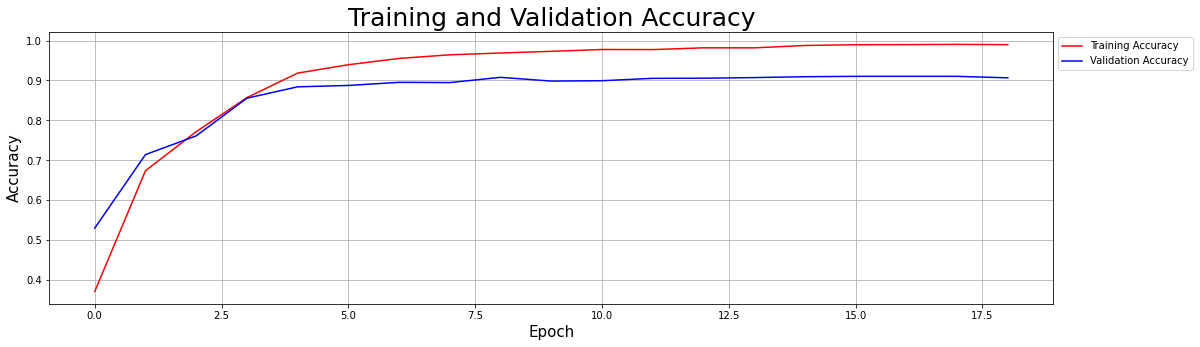

time: 243 ms (started: 2021-07-17 10:35:00 +00:00)


In [29]:
plot_accuracy(history)

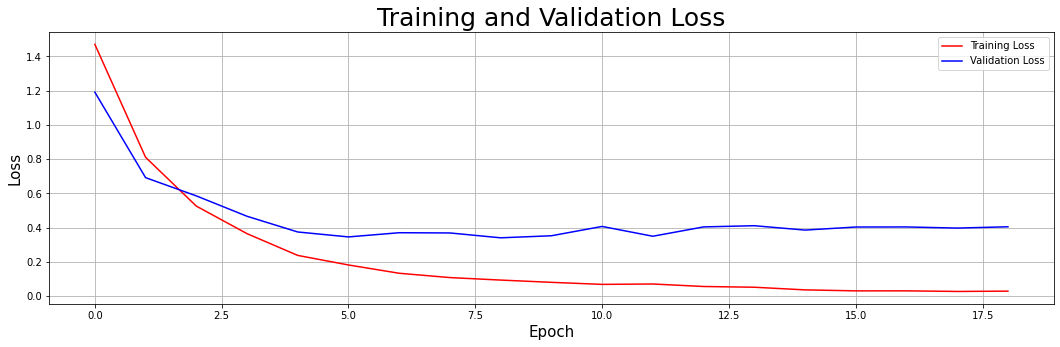

time: 217 ms (started: 2021-07-17 10:35:03 +00:00)


In [30]:
plot_loss(history)

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpiiavj_is/assets


INFO:tensorflow:Assets written to: /tmp/tmpiiavj_is/assets


time: 8.24 s (started: 2021-07-17 10:36:56 +00:00)


In [47]:
def predict_sentence(sentence, model=model):
  seq = tokenizer.texts_to_sequences([sentence])
  pad = pad_sequences(seq)
  predict_array = model.predict(pad)[0]
  maks = max(predict_array)

  for i in range(len(predict_array)):
    if predict_array[i] == maks:
      index = i
      break

  if index == 0:
    predict_label = "Anger"
  elif index == 1:
    predict_label = "Fear"
  elif index == 2:
    predict_label = "Joy"
  elif index == 3:
    predict_label = "Love"
  elif index == 4:
    predict_label = "Sadness"
  else:
    predict_label = "Surprise"

  dff = pd.DataFrame()
  dff['Emotion'] = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']
  dff['Probability'] = predict_array

  return predict_label, dff

time: 19.7 ms (started: 2021-07-17 10:59:21 +00:00)


In [49]:
sentence = "I graduated from the Bandung Institute of Technology"

label, prob = predict_sentence(sentence)

print("The sentence is detected as :", label)
print(prob)

The sentence is detected as : Joy
    Emotion  Probability
0     Anger     0.011553
1      Fear     0.013183
2       Joy     0.724679
3      Love     0.176080
4   Sadness     0.039877
5  Surprise     0.034629
time: 56.3 ms (started: 2021-07-17 11:00:51 +00:00)


In [51]:
sentence1 = "I was sad when I failed to enter the Bandung Institute of Technology"

label1, prob1 = predict_sentence(sentence1)

print("The sentence is detected as :", label1)
print(prob1)

The sentence is detected as : Sadness
    Emotion  Probability
0     Anger     0.026809
1      Fear     0.004812
2       Joy     0.014071
3      Love     0.001156
4   Sadness     0.951695
5  Surprise     0.001456
time: 53.9 ms (started: 2021-07-17 11:01:25 +00:00)
